# <p style="background-color:#14d93e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SALES PREDICTION AND MACHINE LEARNING

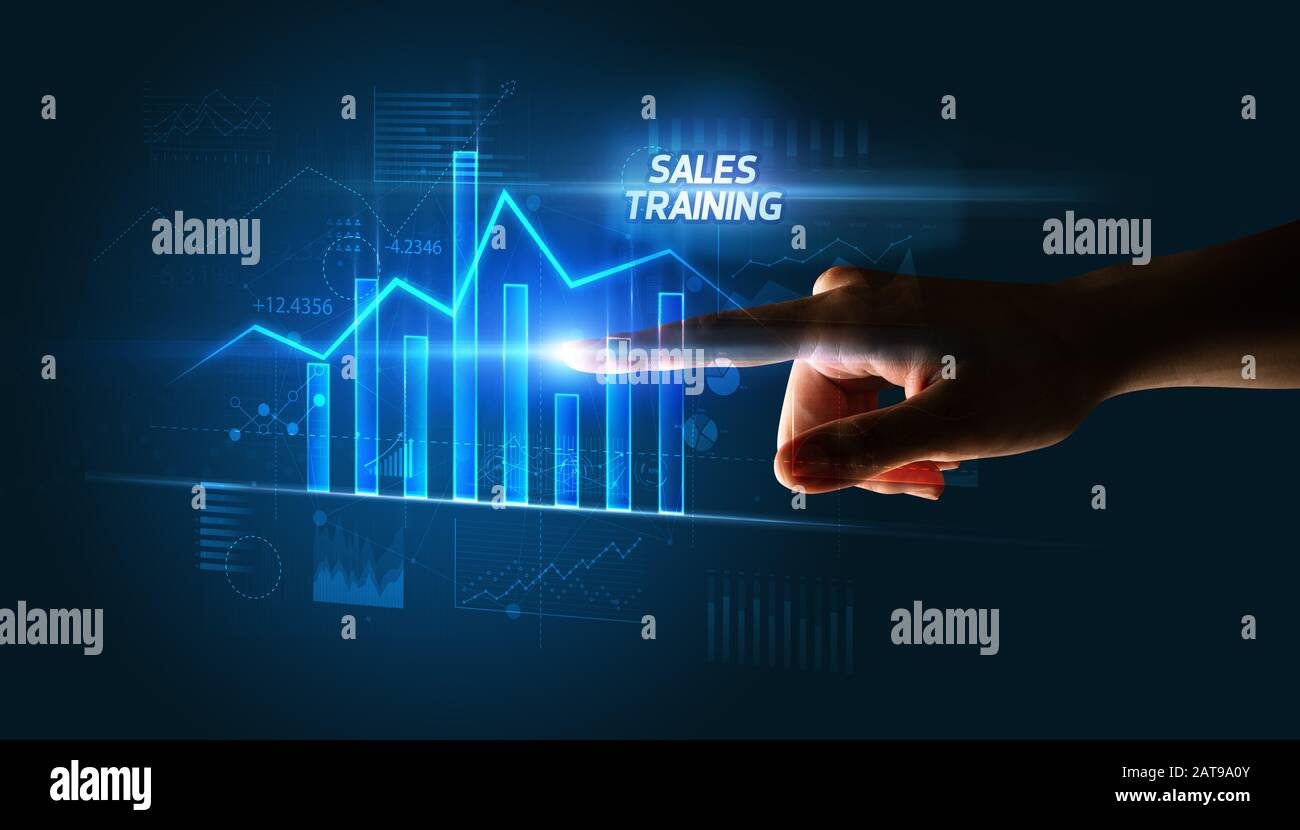

# <p style="background-color:#14d93e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORT LIBRARIES</P>

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
ad=pd.read_csv(r"C:\Users\91999\Downloads\archive (9)\advertising.csv")

In [3]:
ad.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
ad.tail(15)

,TV,Radio,Newspaper,Sales
185,205.0,45.1,19.6,22.6
186,139.5,2.1,26.6,10.3
187,191.1,28.7,18.2,17.3
188,286.0,13.9,3.7,20.9
189,18.7,12.1,23.4,6.7
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3


# <p style="background-color:#14d93e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EXPLORING DATA ANALYSIS</P>

In [5]:
ad.shape

(200, 4)

In [6]:
ad.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [7]:
ad.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
ad.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [9]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
ad.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# <p style="background-color:#14d93e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA EXPLORATION AND VISUALIZATION</P>

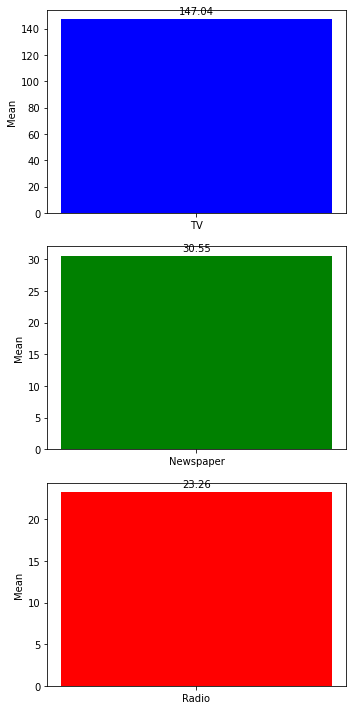

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ad' is a valid DataFrame

# Create a 3x1 grid of subplots (3 rows, 1 column) with a specific size
fig, axs = plt.subplots(3, figsize=(5, 10))

# Calculate mean values of the variables
tv_mean = ad['TV'].mean()
newspaper_mean = ad['Newspaper'].mean()
radio_mean = ad['Radio'].mean()

# Create bar plots for each variable's mean and store the plot objects
plt1 = axs[0].bar('TV', tv_mean, color='blue')
plt2 = axs[1].bar('Newspaper', newspaper_mean, color='green')
plt3 = axs[2].bar('Radio', radio_mean, color='red')

# Set y-axis labels for each subplot
axs[0].set_ylabel('Mean')
axs[1].set_ylabel('Mean')
axs[2].set_ylabel('Mean')

# Function to add labels to the bars
def add_labels(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to the bar plots
add_labels(plt1, axs[0])
add_labels(plt2, axs[1])
add_labels(plt3, axs[2])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


* The highest rate in the bar plot is the highest rate in each subplot for TV advertising. This corresponds to the medium with the highest average ad spend in each case.

<AxesSubplot:>

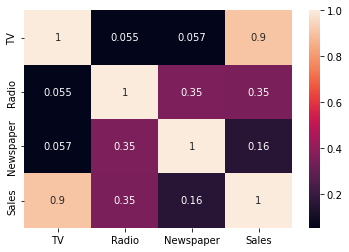

In [12]:
sns.heatmap(ad.corr(),annot=True)

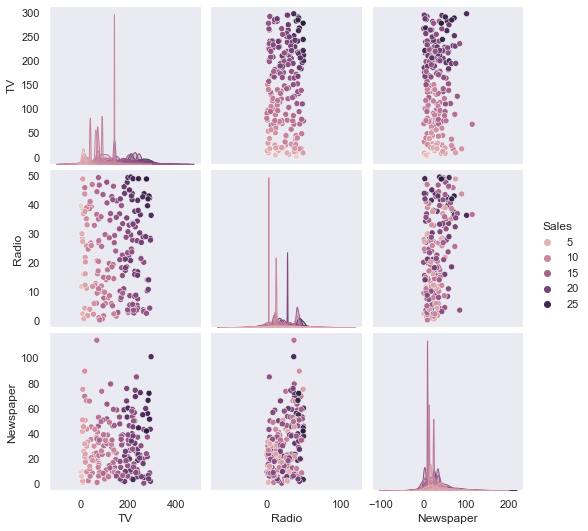

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ad' is a valid DataFrame with necessary columns

sns.set(style='dark')
sns.pairplot(ad, hue="Sales")
plt.show()


# <p style="background-color:#14d93e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> DATA SPLITTING</P>

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = np.random.rand(100, 2)
y = np.random.randint(2, size=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
X_train

array([[0.08294344, 0.79896876],
       [0.00257587, 0.00504636],
       [0.60131829, 0.8816913 ],
       [0.67650051, 0.18346156],
       [0.89112163, 0.55174678],
       [0.85629962, 0.49105161],
       [0.47633215, 0.73100903],
       [0.01772295, 0.22031488],
       [0.3878397 , 0.31231547],
       [0.85725365, 0.69467677],
       [0.38620681, 0.37621312],
       [0.71527956, 0.70547404],
       [0.17633872, 0.40258416],
       [0.93164375, 0.52179221],
       [0.56594438, 0.89549513],
       [0.17177162, 0.13979764],
       [0.23201891, 0.81021891],
       [0.82085208, 0.27545215],
       [0.3164004 , 0.64887339],
       [0.36618031, 0.33799852],
       [0.50976712, 0.21840074],
       [0.04684   , 0.75154649],
       [0.20139862, 0.20649719],
       [0.68410256, 0.74123773],
       [0.36016357, 0.37999176],
       [0.6422533 , 0.12442495],
       [0.40506009, 0.40660816],
       [0.95454111, 0.53587526],
       [0.42787375, 0.00385037],
       [0.83958202, 0.40465052],
       [0.

In [16]:
X_test

array([[0.49449039, 0.47841719],
       [0.87073084, 0.26416458],
       [0.82920737, 0.90185726],
       [0.4479348 , 0.86942819],
       [0.91578797, 0.07325275],
       [0.46535193, 0.15818865],
       [0.41094964, 0.81127829],
       [0.50604589, 0.10264817],
       [0.9893604 , 0.40486743],
       [0.73526494, 0.51577832],
       [0.12821031, 0.77557683],
       [0.42247342, 0.39358505],
       [0.65335712, 0.49769977],
       [0.1832756 , 0.41980813],
       [0.61646078, 0.4049391 ],
       [0.43105274, 0.211564  ],
       [0.1237961 , 0.62175513],
       [0.35873358, 0.75432759],
       [0.4558531 , 0.28472566],
       [0.63763736, 0.3958916 ]])

In [17]:
y_train

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [18]:
y_test

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [19]:
model.fit(X_train,y_train)

LogisticRegression()

In [20]:
model.score(X_train,y_train)

0.625

In [21]:
model.score(X_test,y_test)

0.5

# <p style="background-color:#14d93e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MACHINE LEARNING  MODELS</P>

Implemented state-of-the-art machine learning techniques, such as regression (linear regression, decision tree regression, random forest regression).

# <p style="background-color:#14d93e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LINEAR REGRESSION</p>

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some example data
np.random.seed(0)
X = np.random.rand(100, 1)  # Input feature
y = 2 * X + 1 + np.random.randn(100, 1) * 0.2  # True output with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the coefficient (slope) and intercept of the linear regression line
print("Coefficient:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

Mean Squared Error: 0.041737335262780735
Coefficient: 1.9745886031304998
Intercept: 1.0644717060842688


# <p style="background-color:#14d93e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> DECISION TREES</P>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Assuming 'sales' is your target variable and other columns are features
X = ad.drop('Sales', axis=1)
y = ad['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 3.4019999999999997
R-squared: 0.8899068317956319


# <p style="background-color:#14d93e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">RANDOM FOREST </P>

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'sales' is your target variable and other columns are features
X = ad.drop('Sales', axis=1)
y = ad['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 1.4374328500000009
R-squared: 0.9534827934927883


# <p style="background-color:#14d93e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">GRADIENT BOOSTING</P>

Mean Squared Error: 0.05011104755128217


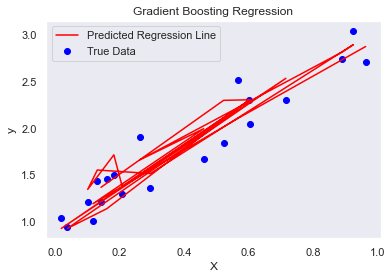

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(0)
X = np.random.rand(100, 1)  # Input feature
y = 2 * X + 1 + np.random.randn(100, 1) * 0.2  # True output with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Train the model on the training data
model.fit(X_train, y_train.ravel())

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the original data and the predicted regression line
plt.scatter(X_test, y_test, color='blue', label='True Data')
plt.plot(X_test, y_pred, color='red', label='Predicted Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Gradient Boosting Regression')
plt.show()

# <p style="background-color:#14d93e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MODEL EVALUATION</p>

In [26]:
from sklearn.metrics import mean_absolute_error

# Assuming y_true contains the actual sales values and y_pred contains the predicted sales values
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.19147088247502592


In [27]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.223854969905254


In [28]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

R-squared (R²): 0.871762142371623


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true contains the actual sales values and baseline_pred contains the baseline predictions
mae_baseline = mean_absolute_error(y_test, y_pred)
rmse_baseline = mean_squared_error(y_test, y_pred, squared=False)
r2_baseline = r2_score(y_test, y_pred)

print("Baseline MAE:", mae_baseline)
print("Baseline RMSE:", rmse_baseline)
print("Baseline R-squared (R²):", r2_baseline)

Baseline MAE: 0.19147088247502592
Baseline RMSE: 0.223854969905254
Baseline R-squared (R²): 0.871762142371623


# <p style="background-color:#14d93e;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">THE END</p>